In [ ]:
stations = []
# get the list of subway stations from wikipedia
r = requests.get('https://en.wikipedia.org/wiki/List_of_Toronto_subway_stations')
html_doc = r.text
soup = BeautifulSoup(html_doc)
# 4 tables in wiki website, with the 2nd one specifying existing subway stations
# 4th one will be the stations under construction
table = soup.find_all('tbody')[1] 
for th in table.find_all('th'):
    if th.get('scope') == 'row':
        stations.append(th.text.strip('\n'))
print(f"TTC subway stations: {stations}")

TTC subway stations: ['Finch', 'North York Centre', 'Sheppard–Yonge', 'York Mills', 'Lawrence', 'Eglinton', 'Davisville', 'St. Clair', 'Summerhill', 'Rosedale', 'Bloor–Yonge', 'Wellesley', 'College', 'Dundas', 'Queen', 'King', 'Union', 'St. Andrew', 'Osgoode', 'St. Patrick', "Queen's Park", 'Museum', 'St. George', 'Spadina', 'Dupont', 'St. Clair West', 'Eglinton West', 'Glencairn', 'Lawrence West', 'Yorkdale', 'Wilson', 'Sheppard West', 'Downsview Park', 'Finch West', 'York University', 'Pioneer Village', 'Highway 407', 'Vaughan Metropolitan Centre', 'Kipling', 'Islington', 'Royal York', 'Old Mill', 'Jane', 'Runnymede', 'High Park', 'Keele', 'Dundas West', 'Lansdowne', 'Dufferin', 'Ossington', 'Christie', 'Bathurst', 'Bay', 'Sherbourne', 'Castle Frank', 'Broadview', 'Chester', 'Pape', 'Donlands', 'Greenwood', 'Coxwell', 'Woodbine', 'Main Street', 'Victoria Park', 'Warden', 'Kennedy', 'Lawrence East', 'Ellesmere', 'Midland', 'Scarborough Centre', 'McCowan', 'Bayview', 'Bessarion', 'Lesl

In [ ]:
stations = [re.sub(u"\u2013", "-", station.
                   replace('.', '').
                   replace(' ', '_').
                   replace("'", '').
                   lower()) + '_station' for station in stations]

In [ ]:
# caveat: https://groups.google.com/g/myttc has no active discussion since 2011 so my ttc might not have updated data
def get_subway_location(station):
    stop_attrs = []
    url = 'https://myttc.ca/' + station
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)
    if soup.find_all('h1')[0].text == "Welcome to MyTTC.ca":
        print(f"no data for {station}")
        return None
    else:
        print("")
        # print(soup.find_all('h1')[0].text)
    for link in soup.find_all('li'):
        try:
            if link['class'] == ['stop']:
                stop_dict = link.attrs
                stop_dict['name'] = link.a.text
                stop_attrs.append(link.attrs)
        except KeyError:
            pass 
    df = pd.DataFrame(stop_attrs)
    try:
        df['lat'] = df['lat'].astype(float)
        df['lng'] = df['lat'].astype(float)
        # print(df['lat'].mean(), df['lng'].mean())
    except KeyError as e:
        print(f"{station} has no {e}")
        sys.exit(f"{station} has no {e}")

In [ ]:
print(stations.index('sheppard_west_station'))
for station in stations:
    get_subway_location(station)

31































no data for sheppard_west_station
no data for downsview_park_station
no data for finch_west_station
no data for york_university_station
no data for pioneer_village_station
no data for highway_407_station
no data for vaughan_metropolitan_centre_station







































In [ ]:
station = stations[0]
stop_attrs = []
url = 'https://myttc.ca/' + station
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
print(soup.find_all('h1')[0].text)
# print(soup)
for link in soup.find_all('li'):
    try:
        if link['class'] == ['stop']:
            stop_dict = link.attrs
            stop_dict['name'] = link.a.text
            stop_attrs.append(link.attrs)
    except KeyError:
        pass 
    df = pd.DataFrame(stop_attrs)
    df['lat'] = df['lat'].astype(float)
    df['lng'] = df['lat'].astype(float)
    df.lat.mean()
    df.lng.mean()

# print(stop_lat)


Finch Station


43.78126634868571

In [ ]:
# https://myttc.ca/developers
# https://open.toronto.ca/dataset/ttc-routes-and-schedules/ 
# https://www.ttc.ca/routes-and-schedules#/1/0 
stops = pd.read_csv('./data/stops.txt')

In [ ]:
stops # bus stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,Danforth Rd at Kennedy Rd,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,Davenport Rd at Bedford Rd,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,Davenport Rd at Dupont St,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2
3,265,1871,Davisville Ave at Cleveland St,NaN,43.702088,-79.378112,NaN,NaN,NaN,NaN,NaN,1
4,266,11700,Disco Rd at Attwell Dr,NaN,43.701362,-79.594843,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9450,24453,16052,Weston Rd at St. Phillips Rd,NaN,43.706383,-79.532709,NaN,NaN,NaN,NaN,NaN,1
9451,24454,16051,Opp 4005 Eglinton Ave West,NaN,43.683481,-79.520090,NaN,NaN,NaN,NaN,NaN,1
9452,24455,16050,4005 Eglinton Ave West,NaN,43.683356,-79.519442,NaN,NaN,NaN,NaN,NaN,1
9453,24460,12748,Rylander Blvd at Sheppard Ave East,NaN,43.797731,-79.149996,NaN,NaN,NaN,NaN,NaN,2


<AxesSubplot:>

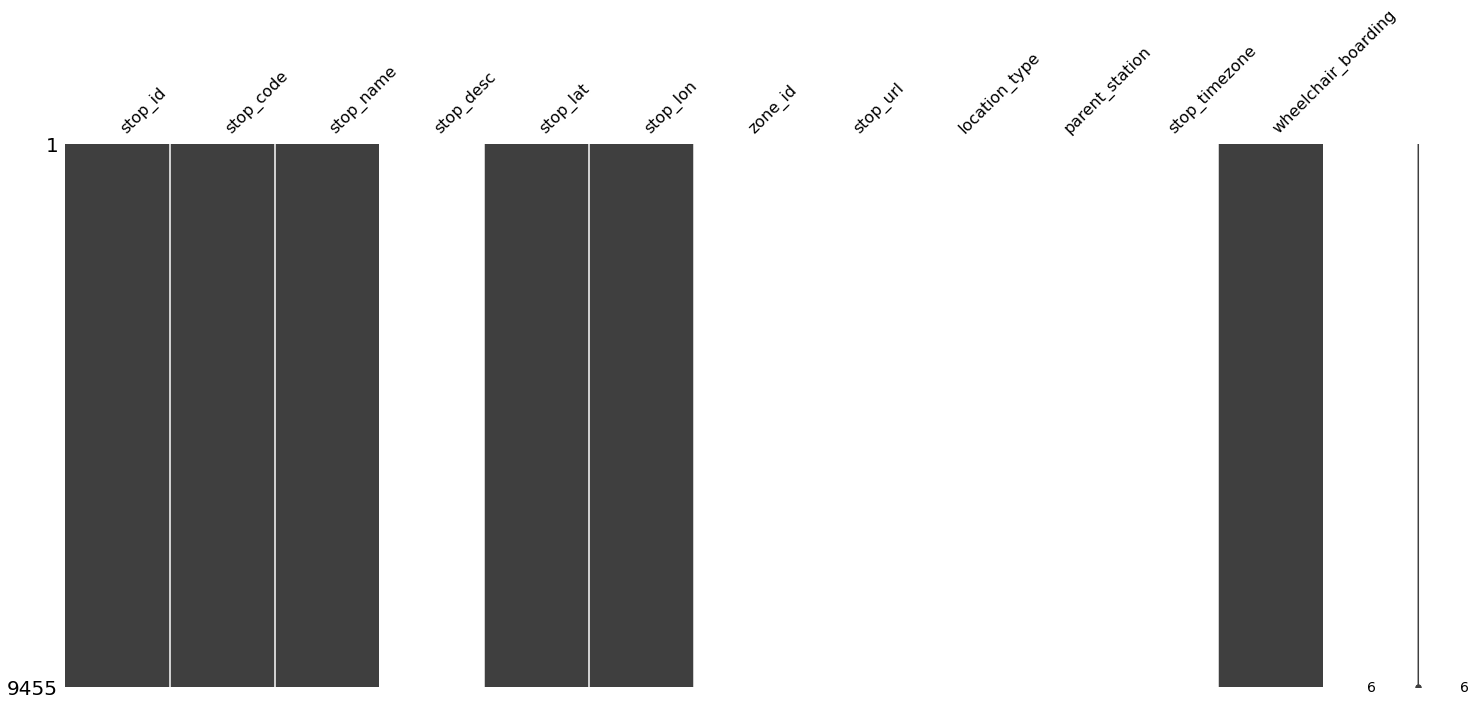

In [ ]:
msno.matrix(stops)

In [ ]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("5600 Yonge Street")
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Soban Cafe, 5600, Yonge Street, Willowdale, North York, Toronto, Golden Horseshoe, Ontario, M2N 5S2, Canada
Latitude = 43.7795729, Longitude = -79.4158217
